Classification Dataset:
Description:

Data were extracted from images that were taken from genuine and forged banknote-like
specimens. For digitization, an industrial camera usually used for print inspection was used. The
final images have 400x 400 pixels. Due to the object lens and distance to the investigated object
gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were
used to extract features from images.


Attributes:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


In [405]:
#Importing all the necessary libraries 

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Tavleen Bajwa\Desktop\ML IIITB\data_banknote_authentication.txt")

In [406]:
df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

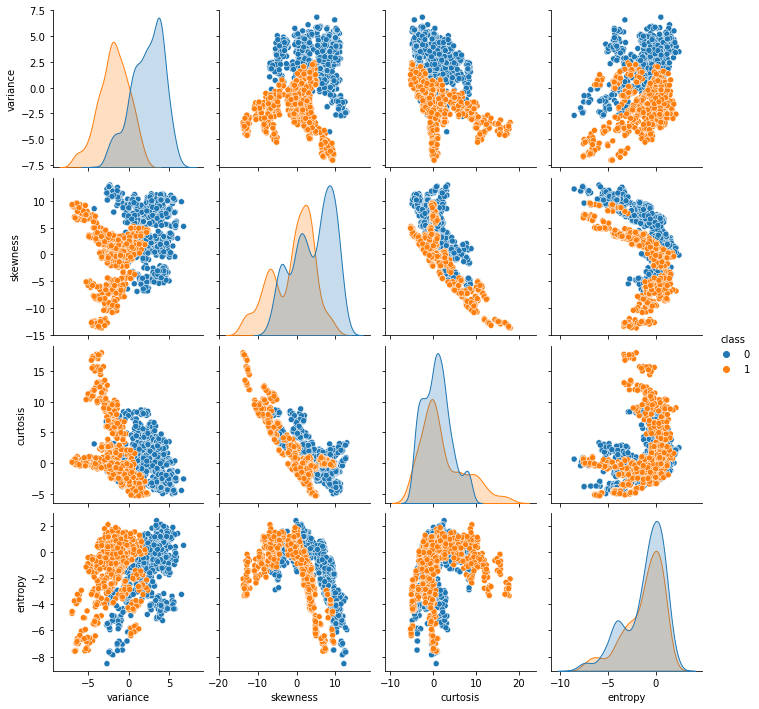

In [407]:
#Pairplot 
sns.pairplot(df,hue='class')

<AxesSubplot:>

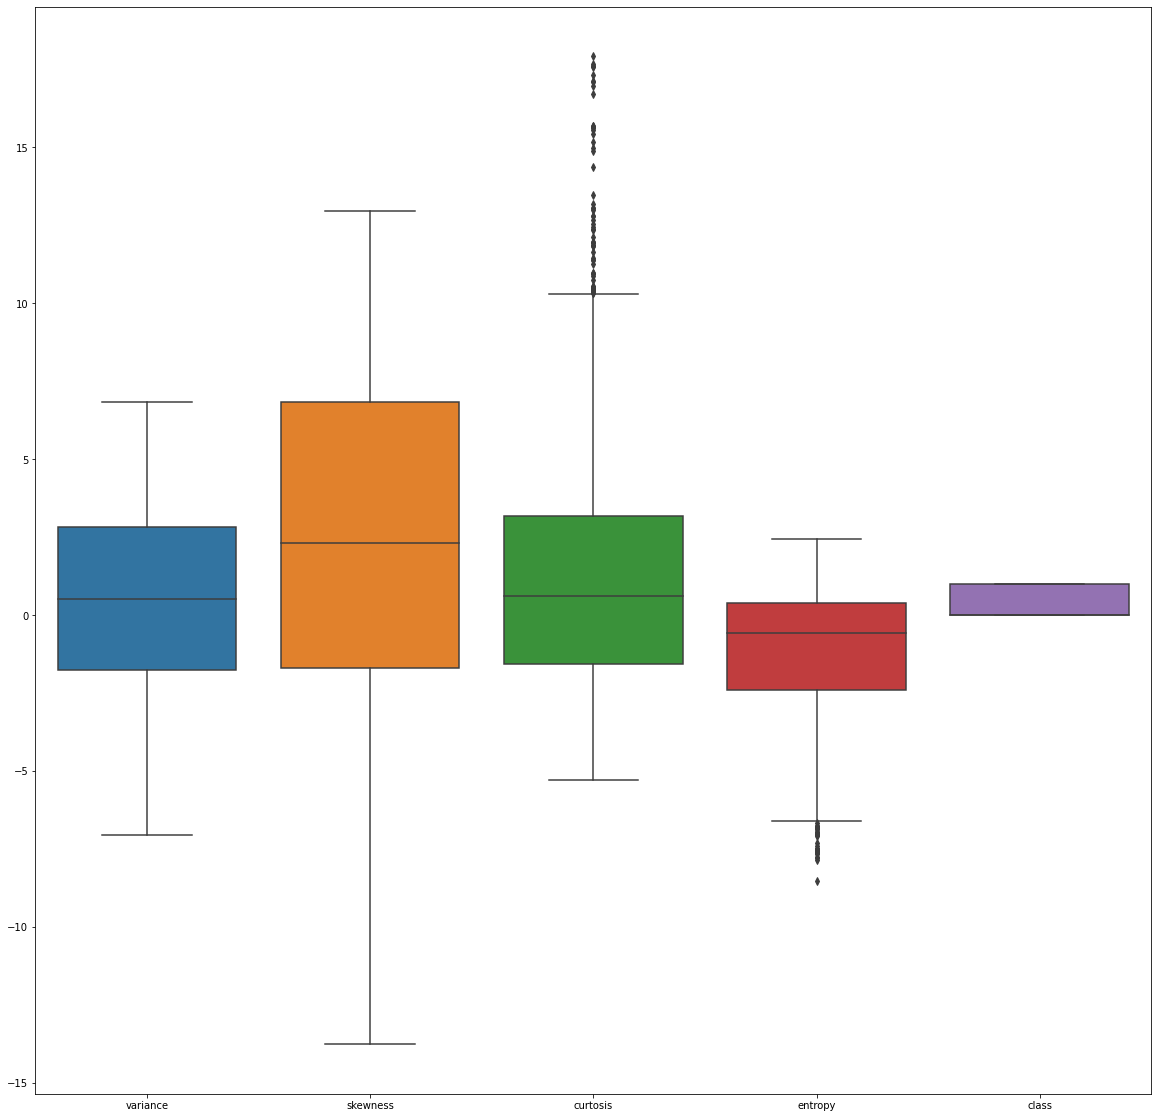

In [408]:
#Box plot of raw data
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

#The plots shows that all columns have values in range -10 to +10 
#curtosis has outliers 

In [409]:
#Chcek for Nan values 

df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [410]:
#Check for duplicated values 

df.duplicated().sum()

24

In [411]:
#Duplicate rows were removed 

df = df.drop_duplicates()

In [412]:
df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1348 rows x 5 columns]

In [413]:
df.duplicated().sum()

0

<AxesSubplot:>

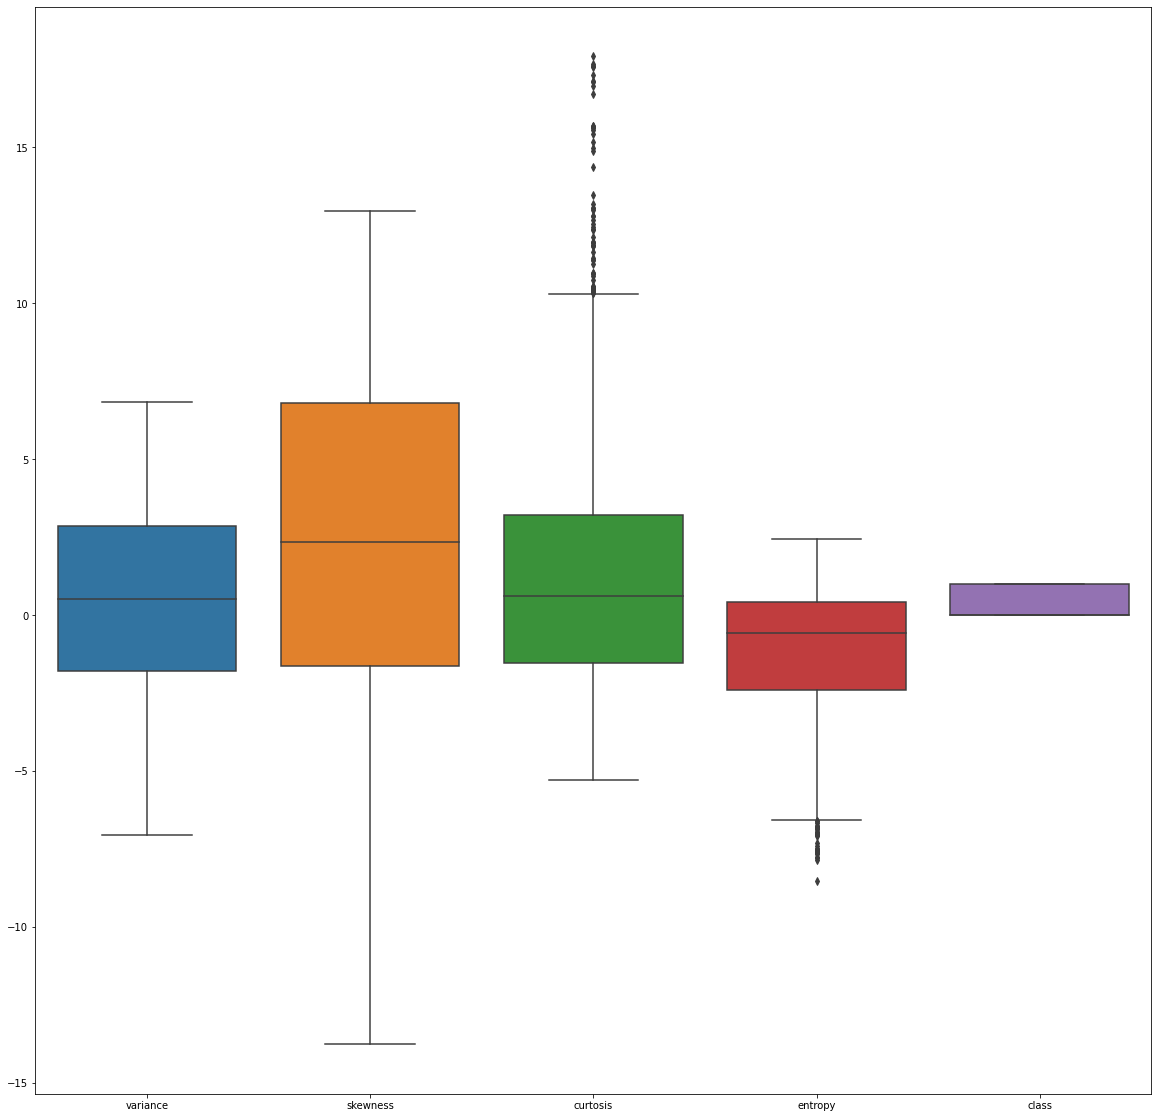

In [414]:
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

#  Distribution before preprocessing

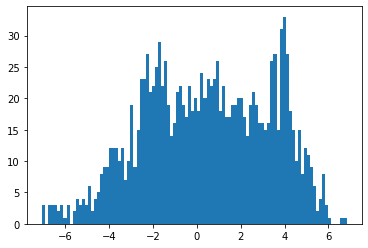

In [415]:
#Variance
plt.hist(df["variance"], bins=100)
plt.show()

#Bimodal distribution 

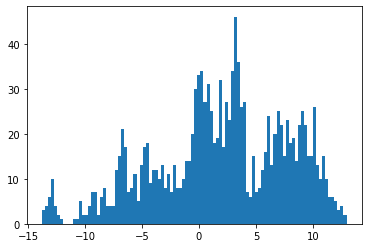

In [416]:
#skewness
plt.hist(df["skewness"], bins=100)
plt.show()


#Bimodal distribution

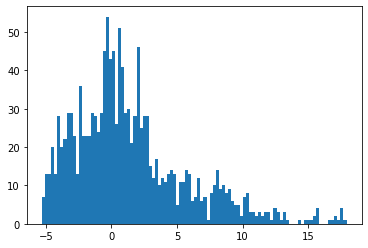

In [417]:
#curtosis
plt.hist(df["curtosis"], bins=100)
plt.show()


#Shows right skewed distribution

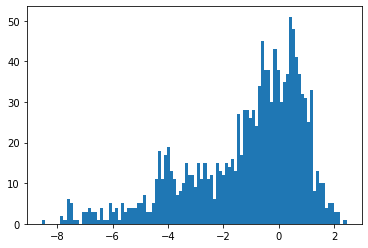

In [418]:
#entropy
plt.hist(df["entropy"], bins=100)
plt.show()


#Shows left skewed distribution

In [419]:
#Class for normalization

class MinMaxScaler:
    def __init__(self, minimum_elem, maximum_elem):
        self.minimum_elem = minimum_elem 
        self.maximum_elem = maximum_elem 
    
    def scale(self, x):
        return (x - self.minimum_elem)/(self.maximum_elem - self.minimum_elem)

In [420]:
#Class for standardization 

class Standardizer: 
    def __init__(self, mean, stdev):
        self.mean = mean 
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

# 1. Variance

In [421]:
#Normalization

In [422]:
variance_scaler = MinMaxScaler(df["variance"].min(),df["variance"].max())

In [423]:
variance_scaled = df["variance"].apply(variance_scaler.scale)

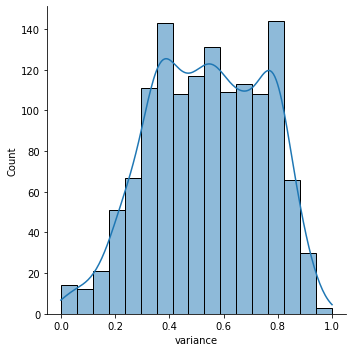

In [424]:
sns.displot(variance_scaled,kde=True )
plt.show()

In [425]:
#Standardization

In [426]:
std_variance = variance_scaled.apply(Standardizer(variance_scaled.mean(), variance_scaled.std()).scale)  


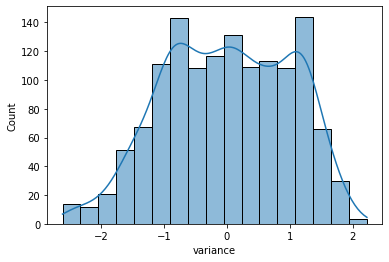

In [427]:
sns.histplot(std_variance, kde=True)
plt.show()

In [428]:
#Adding to new column 

In [429]:
df["variance_n"] = std_variance

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_48748\1333522955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["variance_n"] = std_variance


# 2. Skewness

In [430]:
#Normalization

In [431]:
skewness_scaler = MinMaxScaler(df["skewness"].min(),df["skewness"].max())

In [432]:
skewness_scaled = df["skewness"].apply(skewness_scaler.scale)

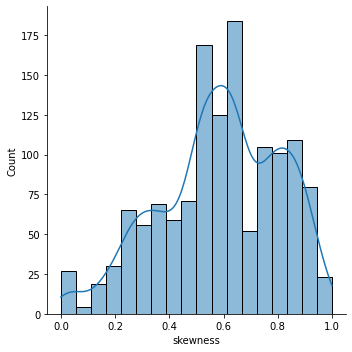

In [433]:
sns.displot(skewness_scaled,kde=True )
plt.show()

In [434]:
#Standardization

In [435]:
std_skewness = skewness_scaled.apply(Standardizer(skewness_scaled.mean(), skewness_scaled.std()).scale)  

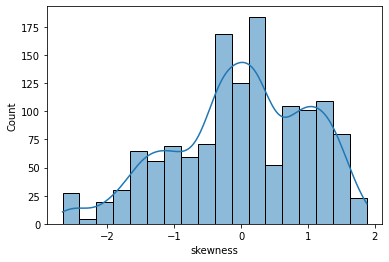

In [436]:
sns.histplot(std_skewness, kde=True)
plt.show()

In [437]:
#Adding to new column

In [438]:
df["skewness_n"] = std_skewness

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_48748\3247298544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["skewness_n"] = std_skewness


# 3. curtosis

In [439]:
#Normalization

In [440]:
curtosis_scaler = MinMaxScaler(df["curtosis"].min(),df["curtosis"].max())

In [441]:
curtosis_scaled = df["curtosis"].apply(curtosis_scaler.scale)

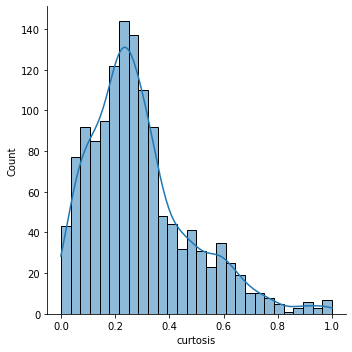

In [442]:
sns.displot(curtosis_scaled,kde=True )
plt.show()

In [443]:
#Standardization

In [444]:
std_curtosis = curtosis_scaled.apply(Standardizer(curtosis_scaled.mean(), curtosis_scaled.std()).scale)  

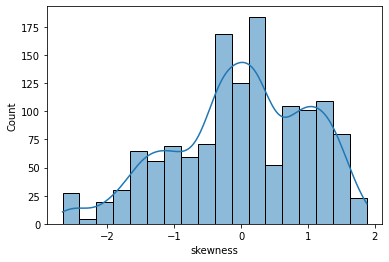

In [445]:
sns.histplot(std_skewness, kde=True)
plt.show()

In [446]:
#Adding to new column

In [447]:
df["curtosis_n"] = std_curtosis

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_48748\3921566095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["curtosis_n"] = std_curtosis


# 4. Entropy

In [448]:
#Normalization

In [449]:
entropy_scaler = MinMaxScaler(df["entropy"].min(),df["entropy"].max())

In [450]:
entropy_scaled = df["entropy"].apply(entropy_scaler.scale)

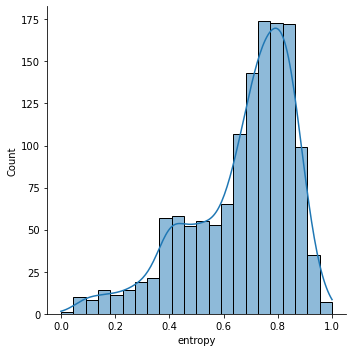

In [451]:
sns.displot(entropy_scaled,kde=True )
plt.show()

In [452]:
#Standardization

In [453]:
std_entropy = entropy_scaled.apply(Standardizer(entropy_scaled.mean(), entropy_scaled.std()).scale)  

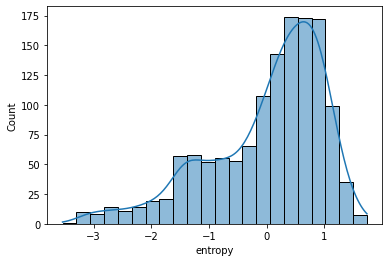

In [454]:
sns.histplot(std_entropy, kde=True)
plt.show()

In [455]:
#Adding to new column

In [456]:
df["entropy_n"] = std_entropy

C:\Users\Tavleen Bajwa\AppData\Local\Temp\ipykernel_48748\3534978009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["entropy_n"] = std_entropy


In [457]:
df

variance  skewness  curtosis  entropy  class  variance_n  skewness_n  \
0      3.62160   8.66610   -2.8073 -0.44699      0    1.109298    1.151392   
1      4.54590   8.16740   -2.4586 -1.46210      0    1.432151    1.066415   
2      3.86600  -2.63830    1.9242  0.10645      0    1.194665   -0.774859   
3      3.45660   9.52280   -4.0112 -3.59440      0    1.051664    1.297373   
4      0.32924  -4.45520    4.5718 -0.98880      0   -0.040709   -1.084456   
...        ...       ...       ...      ...    ...         ...         ...   
1367   0.40614   1.34920   -1.4501 -0.55949      1   -0.013848   -0.095396   
1368  -1.38870  -4.87730    6.4774  0.34179      1   -0.640777   -1.156381   
1369  -3.75030 -13.45860   17.5932 -2.77710      1   -1.465673   -2.618621   
1370  -3.56370  -8.38270   12.3930 -1.28230      1   -1.400495   -1.753696   
1371  -2.54190  -0.65804    2.6842  1.19520      1   -1.043585   -0.437426   

      curtosis_n  entropy_n  
0      -0.975167   0.346004  
1      -0.894605  -0.140655  
2       0.117971   0.611331  
3      -1.253309  -1.162911  
4       0.729657   0.086252  
...          ...        ...  
1367   -0.661607   0.292070  
1368    1.169916   0.724157  
1369    3.738045  -0.771085  
1370    2.536621  -0.054456  
1371    0.293557   1.133294  

[1348 rows x 9 columns]

In [458]:
df_new = df[[
 'variance_n',
 'skewness_n', 'curtosis_n', 'entropy_n', 'class']]

In [459]:
df_new

variance_n  skewness_n  curtosis_n  entropy_n  class
0       1.109298    1.151392   -0.975167   0.346004      0
1       1.432151    1.066415   -0.894605  -0.140655      0
2       1.194665   -0.774859    0.117971   0.611331      0
3       1.051664    1.297373   -1.253309  -1.162911      0
4      -0.040709   -1.084456    0.729657   0.086252      0
...          ...         ...         ...        ...    ...
1367   -0.013848   -0.095396   -0.661607   0.292070      1
1368   -0.640777   -1.156381    1.169916   0.724157      1
1369   -1.465673   -2.618621    3.738045  -0.771085      1
1370   -1.400495   -1.753696    2.536621  -0.054456      1
1371   -1.043585   -0.437426    0.293557   1.133294      1

[1348 rows x 5 columns]

In [460]:
df_new.to_csv("classification.csv")

<AxesSubplot:>

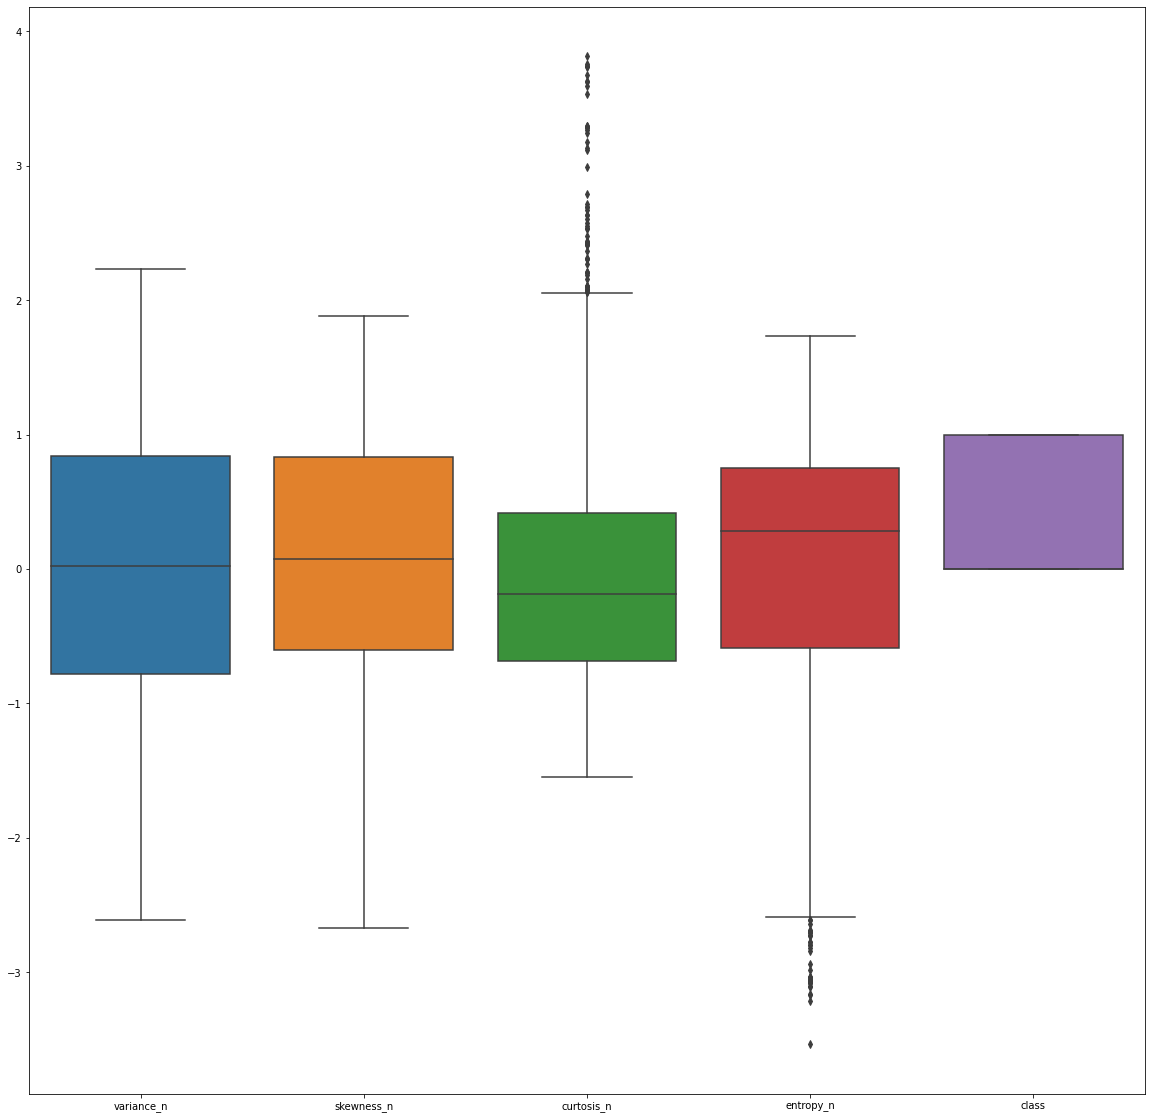

In [461]:
fig ,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [550]:
#Extracting independent and dependent features 
#Here depending feature is actual_productivity
df_new = df_new.sample(frac = 1)
x = df_new.iloc[:,:-1]  #Independent features
y = df_new.iloc[:,-1] #Dependent feature

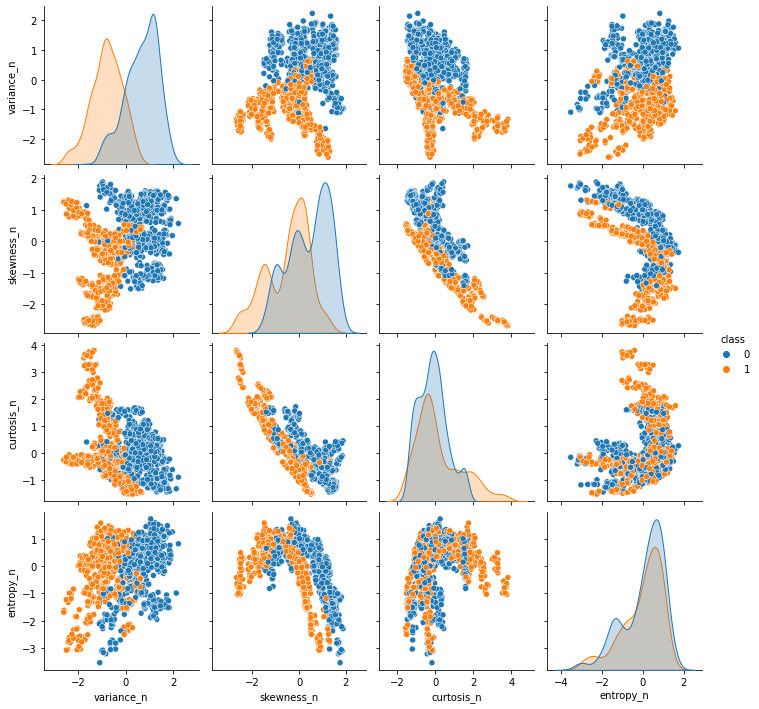

In [551]:
sns.pairplot(df_new,hue='class')

In [552]:
x

variance_n  skewness_n  curtosis_n  entropy_n
1289   -0.648008   -0.687428   -0.350605   0.468130
1361   -0.705222   -0.144061   -0.491155   0.158165
1001   -0.168330   -0.065440   -0.652089   0.195362
1272   -1.634383    0.512483   -0.440281  -1.990524
847    -1.022801   -1.569989    1.253458   0.277189
...          ...         ...         ...        ...
1195   -0.844696    0.165876   -0.859950  -0.577066
1105   -0.739243   -0.681430    0.039373   0.901459
69     -0.112656    1.205698   -0.542625  -0.606214
1273   -0.982667   -0.399698    0.064325   0.354063
93      0.699574   -1.401789    1.513186   0.659067

[1348 rows x 4 columns]

In [553]:
y

1289    1
1361    1
1001    1
1272    1
847     1
       ..
1195    1
1105    1
69      0
1273    1
93      0
Name: class, Length: 1348, dtype: int64

In [554]:
from sklearn.model_selection import train_test_split

In [555]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [556]:
x_train

variance_n  skewness_n  curtosis_n  entropy_n
154     0.520455    1.066074   -0.331997  -0.522508
1066   -1.073868   -0.294622    0.088260   1.026682
703     0.302355    0.449368    0.203292   0.668362
247     0.563733   -0.494547    0.877542   0.419772
60      0.853054   -0.249136    0.734024   0.443330
...          ...         ...         ...        ...
747    -0.163947    0.897175   -0.145322   0.197218
694     0.102957   -0.262889    0.181506   0.792349
419     0.527930   -1.196936    1.663243  -0.125122
848    -1.172090   -2.041413    1.617706  -0.396039
979     0.431071    0.391535   -1.375433  -0.586990

[1078 rows x 4 columns]

In [557]:
y_train

154     0
1066    1
703     0
247     0
60      0
       ..
747     0
694     0
419     0
848     1
979     1
Name: class, Length: 1078, dtype: int64

In [558]:
x_test

variance_n  skewness_n  curtosis_n  entropy_n
258     1.152051   -0.189900   -0.105136   1.043404
103     1.010831   -1.111601    0.593463   0.446432
1051   -1.474196    0.103459   -0.134039   0.411713
577     1.205214   -1.141574    0.457869   0.302607
1333   -1.155359    0.444784   -0.460869  -1.483399
...          ...         ...         ...        ...
950    -0.885424   -0.407808    0.067097   1.396157
24      1.392995    1.359432   -1.407709  -1.236693
571     0.630798   -1.201520    0.664921  -0.038348
1148   -0.248812   -0.435310   -0.423651   0.987629
86     -0.550868   -0.000910    1.414003   1.050259

[270 rows x 4 columns]

In [559]:
y_test

258     0
103     0
1051    1
577     0
1333    1
       ..
950     1
24      0
571     0
1148    1
86      0
Name: class, Length: 270, dtype: int64

# Logistic Regression 

In [560]:
sample, features = x_train.shape

In [561]:
sample

1078

In [562]:
features

4

In [563]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [564]:
weights

array([1., 1., 1., 1.])

In [565]:
sigmoid = 1 / (1 + np.exp(-x))

In [566]:
sigmoid

variance_n  skewness_n  curtosis_n  entropy_n
1289    0.343439    0.334605    0.413236   0.614941
1361    0.330655    0.464047    0.379622   0.539459
1001    0.458017    0.483646    0.342519   0.548686
1272    0.163231    0.625388    0.391674   0.120201
847     0.264482    0.172218    0.777898   0.568857
...          ...         ...         ...        ...
1195    0.300547    0.541374    0.297350   0.359608
1105    0.323170    0.335942    0.509842   0.711249
69      0.471866    0.769537    0.367577   0.352923
1273    0.272363    0.401385    0.516076   0.587602
93      0.668093    0.197532    0.819533   0.659051

[1348 rows x 4 columns]

In [567]:
model = np.dot(x_train, weights)      

In [568]:
model

array([ 0.73202406, -0.25354861,  1.62337783, ...,  0.86911563,
       -1.99183649, -1.13981777])

In [569]:
y_pred = 1 / (1 + np.exp(-model))

In [570]:
y_pred

array([0.67524928, 0.43695026, 0.83526045, ..., 0.70456165, 0.12006271,
       0.24235382])

In [571]:
y_pred_list = []
for i in y_pred:
    if i > 0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

In [572]:
y_pred_final = np.array(y_pred_list)

In [573]:

weights = np.ones(features)
e = 0

for i in range(iters):
    w1_list = []

    model = np.dot(x_train, weights)      # wt.x
    y_pred = 1 / (1 + np.exp(-model)) + e    #sigmoid func
    
    w1 = (1/sample)*np.dot(x_train.T, (y_pred - y_train))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list.append(w1)
    
    weights -= weights*w1


In [574]:
w1_list

[array([ 3.29899321e-01,  1.68563461e-01, -3.83861156e-15,  2.75369294e-02])]

In [575]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [576]:
y_train

154     0
1066    1
703     0
247     0
60      0
       ..
747     0
694     0
419     0
848     1
979     1
Name: class, Length: 1078, dtype: int64

In [577]:
y_pred_final.size

1078

In [578]:
confusion_matrix(y_train,y_pred_final)

array([[110, 479],
       [429,  60]], dtype=int64)

In [579]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_train,y_pred_final).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_train,y_pred_final)

{'Accuracy': 0.15769944341372913,
 'Precision': 0.11131725417439703,
 'Recall': 0.12269938650306748,
 'Specficity': 0.1867572156196944,
 'F1': 0.11673151750972761}

In [580]:
auc = roc_auc_score(y_train,y_pred_final)

In [581]:
auc

0.15472830106138094

In [582]:
fpr, tpr, thresholds  = roc_curve(y_train,y_pred_final)

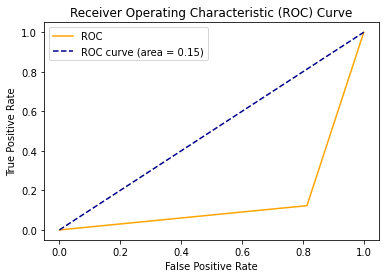

In [583]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [584]:
#For test data 

In [585]:
sample1, features1 = x_test.shape

In [586]:
sample1

270

In [587]:
features1

4

In [588]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [589]:
weights

array([1., 1., 1., 1.])

In [590]:
model1 = np.dot(x_test, weights)

In [591]:
model1

array([ 1.90041856e+00,  9.39124952e-01, -1.09306268e+00,  8.24116416e-01,
       -2.65484287e+00,  1.52450700e+00, -1.60603210e+00,  2.69991804e+00,
        1.17979826e+00, -5.41595955e-02, -4.80032397e+00,  1.65208452e+00,
        2.34175474e+00,  8.94128849e-01,  1.12404164e+00,  6.70269722e-01,
        6.94601653e-01,  1.09652636e+00,  1.47003797e+00, -6.95659633e-01,
        1.16658881e+00,  3.76425139e-01,  4.70927420e-01,  3.78864008e-02,
        1.43296148e+00,  7.28638163e-01, -1.55486296e+00,  1.54596764e+00,
       -9.92988524e-01, -3.18052190e-02, -1.05547402e+00, -8.42179669e-01,
       -1.37201406e+00,  2.31081811e+00, -2.37513261e+00, -9.04015483e-01,
        2.39557211e+00,  2.13955133e+00, -2.31013113e+00,  3.28735156e-02,
       -1.11953605e+00, -8.11661879e-01,  9.75462191e-01, -1.03065079e+00,
        2.13070692e+00,  1.35714416e+00,  1.77001528e+00,  1.95727658e+00,
        1.17458395e+00,  2.13529016e+00, -1.05092617e+00,  1.88945314e-01,
        1.92065154e+00, -

In [592]:
y_pred1 = 1 / (1 + np.exp(-model1))

In [593]:
y_pred1

array([0.86993889, 0.71892287, 0.25104199, 0.69510944, 0.06569115,
       0.8212012 , 0.16714023, 0.93702181, 0.76491153, 0.48646341,
       0.00815995, 0.83917258, 0.91227662, 0.70974149, 0.75473763,
       0.66156355, 0.6669898 , 0.74960868, 0.81306316, 0.33277524,
       0.76252787, 0.5930106 , 0.61560324, 0.50947047, 0.80736233,
       0.67450636, 0.17438501, 0.82433057, 0.27032219, 0.49204937,
       0.25817533, 0.30107592, 0.20229464, 0.90976904, 0.08508872,
       0.28822601, 0.91648903, 0.89468834, 0.09028737, 0.50821764,
       0.24609735, 0.30753647, 0.72620689, 0.26295795, 0.8938521 ,
       0.79529516, 0.85445957, 0.87623791, 0.76397259, 0.89428618,
       0.25904729, 0.5470963 , 0.87221107, 0.07942918, 0.78926471,
       0.71372345, 0.18636189, 0.85728204, 0.39910891, 0.11545105,
       0.72014385, 0.07366733, 0.17219164, 0.91078053, 0.71281373,
       0.60659109, 0.87512991, 0.24006391, 0.73917658, 0.56697772,
       0.59545568, 0.83776732, 0.68755642, 0.58676967, 0.18060

In [594]:
y_pred1_list = []
for i in y_pred1:
    if i > 0.5:
        y_pred1_list.append(1)
    else:
        y_pred1_list.append(0)

In [595]:
len(y_pred1_list)

270

In [596]:
y_pred1_final = np.array(y_pred1_list)

In [597]:
y_pred1_final

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [598]:
weights = np.ones(features)
e = 0

for i in range(iters):
    w1_test_list = []

    model1 = np.dot(x_test, weights)      # wt.x
    y_pred1 = 1 / (1 + np.exp(-model1)) + e    #sigmoid func
    
    w1_test = (1/sample1)*np.dot(x_test.T, (y_pred1 - y_test))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_test_list.append(w1_test)
    
    weights -= weights*w1_test


In [599]:
w1_test_list

[array([3.61341539e-01, 1.42863043e-01, 8.22387426e-17, 9.81774559e-02])]

In [600]:
confusion_matrix(y_test,y_pred1_final)

array([[ 17, 132],
       [111,  10]], dtype=int64)

In [601]:
model_eval(y_test,y_pred1_final)

{'Accuracy': 0.15769944341372913,
 'Precision': 0.11131725417439703,
 'Recall': 0.12269938650306748,
 'Specficity': 0.1867572156196944,
 'F1': 0.11673151750972761}

In [602]:
auc = roc_auc_score(y_test,y_pred1_final)

In [603]:
auc

0.09836929391535856

In [604]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred1_final)

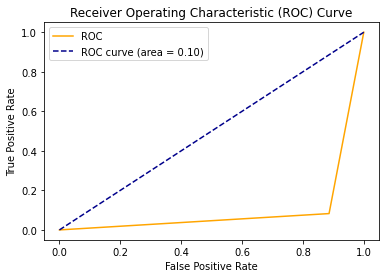

In [605]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [606]:
#Logistic regression using only 2 columns: Variance and skewness

In [728]:
df_2 = df_new[["variance_n", "skewness_n", "class"]]

In [729]:
df_2

variance_n  skewness_n  class
93      0.699574   -1.401789      0
114     0.466699    0.853451      0
709     0.986206    0.257193      0
726    -0.141565    1.127076      0
681     0.627724   -1.031207      0
...          ...         ...    ...
359    -0.967543    1.637283      0
682     1.147895   -0.987125      0
278     0.157139    0.999772      0
849    -0.368693   -1.007232      1
1304   -2.004985   -1.202218      1

[1348 rows x 3 columns]

In [730]:
x = df_2.iloc[:,:-1]  #Independent features
y = df_2.iloc[:,-1] #Dependent feature

In [731]:
x

variance_n  skewness_n
93      0.699574   -1.401789
114     0.466699    0.853451
709     0.986206    0.257193
726    -0.141565    1.127076
681     0.627724   -1.031207
...          ...         ...
359    -0.967543    1.637283
682     1.147895   -0.987125
278     0.157139    0.999772
849    -0.368693   -1.007232
1304   -2.004985   -1.202218

[1348 rows x 2 columns]

In [732]:
y

93      0
114     0
709     0
726     0
681     0
       ..
359     0
682     0
278     0
849     1
1304    1
Name: class, Length: 1348, dtype: int64

In [733]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [734]:
sample, features = x_train.shape

In [735]:
#Initializing parameters
weights = np.ones(features)

#Hyperparameters
learning_rate = 0.001
iters = 1000

In [736]:
model3 = np.dot(x_train, weights)

In [737]:
model3

array([ 0.72357429, -0.76514356,  0.38615796, ...,  0.9578331 ,
        1.79536022, -0.53115452])

In [738]:
y_pred3 = 1 / (1 + np.exp(-model3))

In [739]:
y_pred3

array([0.67339361, 0.31753059, 0.59535747, ..., 0.72268775, 0.8575832 ,
       0.37024765])

In [740]:
y_pred3_list = []
for i in y_pred3:
    if i > 0.5:
        y_pred3_list.append(1)
    else:
        y_pred3_list.append(0)

In [741]:
y_pred3_final = np.array(y_pred3_list)

In [742]:
y_pred3_final

array([1, 0, 1, ..., 1, 1, 0])

In [743]:
weights = np.ones(features)
e = 0

for i in range(iters):
    w1_list_2 = []

    model = np.dot(x_train, weights)      # wt.x
    y_pred3 = 1 / (1 + np.exp(-model3)) + e    #sigmoid func
    
    w1 = (1/sample)*np.dot(x_train.T, (y_pred3 - y_train))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list_2.append(w1)
    
    weights -= weights*w1

In [744]:
w1_list_2

[array([0.59187193, 0.42699046])]

In [745]:
confusion_matrix(y_train,y_pred3_final)

array([[ 78, 508],
       [429,  63]], dtype=int64)

In [746]:
model_eval(y_train,y_pred3_final)

{'Accuracy': 0.49814471243042674,
 'Precision': 0.45454545454545453,
 'Recall': 0.49796747967479676,
 'Specficity': 0.49829351535836175,
 'F1': 0.475266731328807}

In [747]:
sample4, features4 = x_test.shape

In [748]:
sample4

270

In [749]:
features4

2

In [750]:
model4 = np.dot(x_test, weights)

In [751]:
y_pred4 = 1 / (1 + np.exp(-model4))

In [752]:
y_pred4_list = []
for i in y_pred4:
    if i > 0.5:
        y_pred4_list.append(1)
    else:
        y_pred4_list.append(0)

In [753]:
len(y_pred4_list)

270

In [754]:
weights = np.ones(features4)
e = 0

for i in range(iters):
    w1_list_4 = []

    model = np.dot(x_test, weights)      # wt.x
    y_pred4 = 1 / (1 + np.exp(-model4)) + e    #sigmoid func
    
    w1 = (1/sample4)*np.dot(x_test.T, (y_pred4 - y_test))  # (d(L(W)/dW(j) = Xij.(yi - sigmoid_func))
    
    w1_list_4.append(w1)
    
    weights -= weights*w1

In [755]:
w1_list_4

[array([0.37753306, 0.25497413])]

In [756]:
y_pred4_final = np.array(y_pred4_list)

In [757]:
confusion_matrix(y_test,y_pred4_final)

array([[152,   0],
       [118,   0]], dtype=int64)

In [758]:
model_eval(y_test,y_pred4_final)

{'Accuracy': 0.49814471243042674,
 'Precision': 0.45454545454545453,
 'Recall': 0.49796747967479676,
 'Specficity': 0.49829351535836175,
 'F1': 0.475266731328807}

# Naive Bayes Classifier

In [669]:
df_new = df_new.sample(frac = 1)

In [670]:
df_new

variance_n  skewness_n  curtosis_n  entropy_n  class
93      0.699574   -1.401789    1.513186   0.659067      0
114     0.466699    0.853451   -0.621015  -0.195212      0
709     0.986206    0.257193   -0.278747   0.528261      0
726    -0.141565    1.127076    0.007514  -1.324090      0
681     0.627724   -1.031207    0.882486   0.367702      0
...          ...         ...         ...        ...    ...
359    -0.967543    1.637283    0.094614  -2.016556      0
682     1.147895   -0.987125    0.449159   0.557398      0
278     0.157139    0.999772   -0.961305  -0.367514      0
849    -0.368693   -1.007232    0.100158   0.848761      1
1304   -2.004985   -1.202218    2.060737   0.024264      1

[1348 rows x 5 columns]

In [671]:
x, y = df_new.iloc[:, :-1], df_new.iloc[:, -1]

In [672]:
x  #Features

variance_n  skewness_n  curtosis_n  entropy_n
93      0.699574   -1.401789    1.513186   0.659067
114     0.466699    0.853451   -0.621015  -0.195212
709     0.986206    0.257193   -0.278747   0.528261
726    -0.141565    1.127076    0.007514  -1.324090
681     0.627724   -1.031207    0.882486   0.367702
...          ...         ...         ...        ...
359    -0.967543    1.637283    0.094614  -2.016556
682     1.147895   -0.987125    0.449159   0.557398
278     0.157139    0.999772   -0.961305  -0.367514
849    -0.368693   -1.007232    0.100158   0.848761
1304   -2.004985   -1.202218    2.060737   0.024264

[1348 rows x 4 columns]

In [673]:
y   #Target

93      0
114     0
709     0
726     0
681     0
       ..
359     0
682     0
278     0
849     1
1304    1
Name: class, Length: 1348, dtype: int64

In [674]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [675]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1078, 4) (1078,)
(270, 4) (270,)


In [676]:
from math import e

In [677]:
class Gaussian_NB():
    
    def prior(self,x, y):                 
        c_list = []
        tm = []
        for i in y:
            c_list.append(i)
            co = 0
            c1 = 0
            for i in c_list:
                if i == 0:
                    co += 1
                else:
                    c1 +=1
        tm.append(co/len(c_list))
        tm.append(c1/len(c_list))
        self.p = np.asarray(tm)

        return self.p               #Calculation of prior probabilities 
    
    def stats(self, x, y):
        self.mu = x.groupby(y).apply(np.mean).to_numpy()
        self.sigma = x.groupby(y).apply(np.var).to_numpy()
        return self.mu, self.sigma  #Calculation of mu and sigma square for each column for both classes
    
    def pdf(self, cls, x):     
        mean = self.mu[cls]
        var = self.sigma[cls]
        mean = self.mu[cls]
        var = self.sigma[cls]
        e_sq_diff = (x - mean)**2
        e_power = -e_sq_diff / (2 * var) 
        pdf = e ** e_power/np.sqrt(2 * np.pi * var)
        return pdf                                      # N(x; µ, σ) = (1 / 2πσ) * (e ^ (x–µ)^2/-2σ^2            
    
    def posteri(self, x):
        post = []
        for i in range(self.c_num):
            poste = np.log(self.p[i]) + np.sum(np.log(self.pdf(i, x)))  #prior + conditional
            post.append(poste)
        #print(posteriors)
        return self.clss[np.argmax(post)]   #class with highest posterior probabilities
     

    def model(self, x, y):
        self.feature_num = x.shape[1]
        self.clss = np.unique(y)
        self.c_num = len(self.clss)
        self.stats(x, y)
        self.prior(x, y)
        
    def predict_proba(self, x):
        preds = []
        for j in x.to_numpy():
            preds.append(self.posteri(j))
        return preds

    def accuracy_score(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy


# Training data

In [678]:
x = Gaussian_NB()

In [679]:
x.model(x_train, y_train)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [680]:
y_pred = x.predict_proba(x_train)

In [681]:
x.prior(x_train, y_train)

array([0.54359926, 0.45640074])

In [682]:
x.accuracy_score(y_train, y_pred)

0.8441558441558441

# Test data

In [683]:
x.model(x_test, y_test)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [684]:
y_pred2 = x.predict_proba(x_test)

In [685]:
x.prior(x_test, y_test)

array([0.56296296, 0.43703704])

In [686]:
x.accuracy_score(y_test, y_pred2)

0.8703703703703703

# Using Column Variance and Skewness 

In [687]:
df_vs = df_new[["variance_n", "skewness_n", "class"]]

In [688]:
df_vs

variance_n  skewness_n  class
93      0.699574   -1.401789      0
114     0.466699    0.853451      0
709     0.986206    0.257193      0
726    -0.141565    1.127076      0
681     0.627724   -1.031207      0
...          ...         ...    ...
359    -0.967543    1.637283      0
682     1.147895   -0.987125      0
278     0.157139    0.999772      0
849    -0.368693   -1.007232      1
1304   -2.004985   -1.202218      1

[1348 rows x 3 columns]

In [689]:
x1, y1 = df_vs.iloc[:, :-1], df_vs.iloc[:, -1]

In [690]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1 , test_size = .20 , random_state = 144)

In [691]:
x.model(x1_train, y1_train)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [692]:
y1_pred = x.predict_proba(x1_train)

In [693]:
x.accuracy_score(y1_train, y1_pred)

0.8738404452690167

In [694]:
x.model(x1_test, y1_test)

C:\Users\Tavleen Bajwa\Anaconda3\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [695]:
y2_pred = x.predict_proba(x1_test)

In [696]:
x.accuracy_score(y1_test, y2_pred)

0.9111111111111111